<a href="https://colab.research.google.com/github/Saharic/Python/blob/main/M3/S5/Tarea_M4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Riesgo de mercado ( Simulación Montecarlo [Cholesky])

1. Construir ${\Delta X}_{n\times m}$ que es la matriz de diferencias basados en el operador $T_j$ (		donde $T_1(x)=\ln(x)$ ó $T_2(x)=x-1$), es decir $${\Delta X}_\tau=\Big[ T_j(\frac{x_{t,1}}{x_{t+\tau,1}}), T_j(\frac{x_{t,2}}{x_{t+\tau,2}}),\ldots, T_j(\frac{x_{t,m}}{x_{t+\tau,m}})\Big]\quad t=0,1,\ldots, n-1.$$
2. Calcular la matriz de correlación de ${\Delta X}_\tau$, i.e. $\Omega=Corr({\Delta X}_\tau)$. \\
3. Factorizar $\Omega=AA^\top$. \\
4. Analizar la distribución individual de las variaciones de los factores de riesgo ${\Delta X}_{\tau,k}$ ($k=1,\ldots,m$) para ajustar a una función de distribución paramétrica conocida ó utilizar la función empírica tal cual.
5. Calcular matriz $S$ de $N\times m$ valores con $$S_{i\cdot}=\Big[F^{-1}_{{\Delta X}_{\tau,1}}(\alpha_{i 1}),\ldots,F^{-1}_{{\Delta X}_{\tau,m}}(\alpha_{i m})\Big]$$ donde $\alpha_{i\cdot}\sim U(0,1)$ con $N\times m$ valores a.i.i.d. simulados, y $F^{-1}_{{\Delta X}_{\tau,k}}$ es la inversa de la distribución empírica o paramétrica (seleccionada en el paso anterior) de las variaciones del factor de riesgo $k$, i.e. de ${\Delta X}_{\tau,k}$ ($k=1,\ldots,m$).
6. Calcular matriz $\Delta X_{s_\tau}$ como $\Delta X_{s_\tau}=S\cdot A^\top$. 
7. Construir ${X}_{s_{N\times m}}$ que es la matriz de factores de riesgo simulada basada en el vector de precios actual $X_{00}$
$$X_{s_{i\cdot}}=\Big[x_{0,1}T^{-1}_j(\Delta x_{s_{i1}}), \ldots, x_{0,m}T^{-1}_j(\Delta x_{s_{im}})\Big]\quad (i=1,\ldots,N\quad j=1\, \textrm{ó}\, 2),$$
8. Construcción de la matriz de reevaluación del portafolio basada en los escenarios simulados $Y_{N\times r}$ de todos los instrumentos financieros, es decir $$Y_z=[m_1f_1(X_{s_z}), m_2f_2(X_{s_z}),\ldots, m_rf_r(X_{s_z})]\quad (z=1,\ldots,N).$$
9. Construcción de la matriz de pérdidas y ganancias del portafolio basada en los escenarios simulados $\Delta Y_{N\times r}$ de todos los instrumentos financieros, es decir $$\Delta Y_{z\cdot}=Y_z-Y_{0}=[m_1(f_1(X_{s_{z\cdot}})-f_1(X_{00})),\ldots, m_r(f_r(X_{s_{z\cdot}})-f_r(X_{00}))],$$
 para $(z=1,\ldots,N)$. Se puede obtener el vector de pérdidas totales ${\Delta YT}_{N}$ muy fácilmente, esto es $\Delta YT=\sum_{k=1}^r Y_{z\cdot}$ $(z=1,\ldots,N)$, incluso se puede hacer lo mismo por tipo de riesgo, ya que para cada tipo de riesgo pueden existir diferentes instrumentos, lo único que se tiene que hacer es sumar los instrumentos de un mismo tipo de riesgo por escenario.
10. Obtener las medidas de riesgo deseada de la matriz ${\Delta Y}_{\cdot k}$ $(k=1,\ldots,r)$ y $\Delta YT$, ejemplo se puede calcular $VaR_\alpha({\Delta Y}_{\cdot k})$, $CVaR_\alpha({\Delta Y}_{\cdot k})$, $CeR_\alpha({\Delta Y}_{\cdot k})$, $\mu(\Delta Y_{\cdot k})$, $\sigma(\Delta Y_{\cdot k})$, etc. para $k=1,\ldots,r$. 


In [183]:
import numpy as np
!pip install yfinance
import yfinance as yf
import pandas as pd


In [184]:
start = '2020-01-01'

symbol = ['AAPL','MSFT','SQ','AMZN']
stock_data = yf.download(symbol,start)

[*********************100%***********************]  4 of 4 completed


In [186]:
# 1. Matriz de diferencias
print(stock_data.Close.head(5))

X=stock_data.Close
X0=stock_data.Close.tail(1)
DeltaX=np.log(stock_data.Close/stock_data.Close.shift(1))

DeltaX.head
print(X0)

                 AAPL         AMZN        MSFT         SQ
Date                                                     
2020-01-02  75.087502  1898.010010  160.619995  63.830002
2020-01-03  74.357498  1874.969971  158.619995  63.000000
2020-01-06  74.949997  1902.880005  159.029999  62.570000
2020-01-07  74.597504  1906.859985  157.580002  64.589996
2020-01-08  75.797501  1891.969971  160.089996  67.599998
                  AAPL         AMZN        MSFT          SQ
Date                                                       
2022-03-10  158.520004  2936.350098  285.589996  108.870003


In [187]:
# 2. Matriz de correlación
CORR=np.corrcoef(DeltaX.dropna().T)

print(CORR)

[[1.         0.64051293 0.80549064 0.54193161]
 [0.64051293 1.         0.6801251  0.51767694]
 [0.80549064 0.6801251  1.         0.59947287]
 [0.54193161 0.51767694 0.59947287 1.        ]]


In [188]:
# 3. Factorización de Cholesky de matriz de Correlación 
A=np.linalg.cholesky(CORR)
print(A)
print(A@A.T)

[[1.         0.         0.         0.        ]
 [0.64051293 0.76794739 0.         0.        ]
 [0.80549064 0.21381403 0.55269195 0.        ]
 [0.54193161 0.22210211 0.20891111 0.78315831]]
[[1.         0.64051293 0.80549064 0.54193161]
 [0.64051293 1.         0.6801251  0.51767694]
 [0.80549064 0.6801251  1.         0.59947287]
 [0.54193161 0.51767694 0.59947287 1.        ]]


In [189]:
# 4. Analizar la distribución individual de las variaciones de los factores


# importando modulos necesarios
import matplotlib.mlab as mlab
import scipy
import datetime
import matplotlib.pyplot as plt 
import numpy as np # importando numpy
import pandas as pd # importando pandas
from scipy import stats

%matplotlib inline

In [190]:
# Calculamos el promedio y desviación estándar de los factores de riesgo
avg=DeltaX.mean()
stdev=np.sqrt(DeltaX.var())
print(avg)
print(stdev)

AAPL    0.001356
AMZN    0.000792
MSFT    0.001044
SQ      0.000969
dtype: float64
AAPL    0.023263
AMZN    0.021536
MSFT    0.021715
SQ      0.042967
dtype: float64


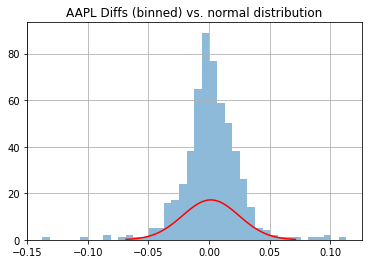

In [191]:
# Obtener histogramas de distribuciones univariadas de lsd diferencias y ajustar a una función de distribución paramétrica 

# AAPL
DeltaX['AAPL'].hist(bins=40, histtype="stepfilled",alpha=0.5)
x = np.linspace(avg['AAPL'] - 3*stdev['AAPL'], avg['AAPL']+3*stdev['AAPL'],100)
plt.plot(x, scipy.stats.norm.pdf(x, avg['AAPL'], stdev['AAPL']), "r")
plt.title("AAPL Diffs (binned) vs. normal distribution")
plt.show()

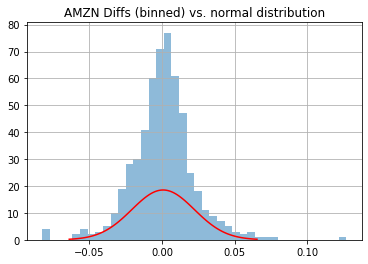

In [192]:
# AMZN
DeltaX['AMZN'].hist(bins=40, histtype="stepfilled",alpha=0.5)
x = np.linspace(avg['AMZN'] - 3*stdev['AMZN'], avg['AMZN']+3*stdev['AMZN'],100)
plt.plot(x, scipy.stats.norm.pdf(x, avg['AMZN'], stdev['AMZN']), "r")
plt.title("AMZN Diffs (binned) vs. normal distribution")
plt.show()

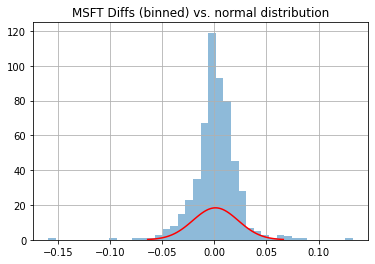

In [193]:
# MSFT
DeltaX['MSFT'].hist(bins=40, histtype="stepfilled",alpha=0.5)
x = np.linspace(avg['MSFT'] - 3*stdev['MSFT'], avg['MSFT']+3*stdev['MSFT'],100)
plt.plot(x, scipy.stats.norm.pdf(x, avg['MSFT'], stdev['MSFT']), "r")
plt.title("MSFT Diffs (binned) vs. normal distribution")
plt.show()

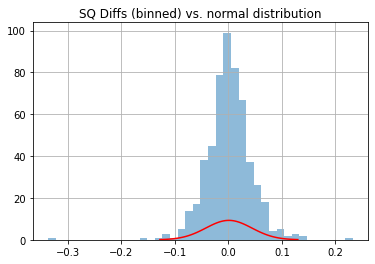

In [195]:
# SQ
DeltaX['SQ'].hist(bins=40, histtype="stepfilled",alpha=0.5)
x = np.linspace(avg['SQ'] - 3*stdev['SQ'], avg['SQ']+3*stdev['SQ'],100)
plt.plot(x, scipy.stats.norm.pdf(x, avg['SQ'], stdev['SQ']), "r")
plt.title("SQ Diffs (binned) vs. normal distribution")
plt.show()

In [196]:
# 5. Calcular matriz S de dimensión Nxm usando la inversa de la distribución empírica
N=10000
m=4
alfa=np.random.uniform(0,1,[N,m]).T
S=np.quantile(DeltaX.dropna().T,alfa).T
print(S)

[[ 0.00067681  0.02039072 -0.00668404  0.00481301]
 [ 0.02589741  0.01939961 -0.02995689  0.00779188]
 [ 0.00480414  0.01629479 -0.05519331  0.00274619]
 ...
 [ 0.01479254  0.01190648  0.00212131 -0.00458279]
 [-0.00467443 -0.00659902  0.00427476 -0.00165112]
 [ 0.00979955  0.01105215  0.0320958  -0.02584288]]


In [197]:
# 6. Calcular matriz DX = S@A.T
DX = S@A.T
print(DX)

[[ 0.00067681  0.0160925   0.00121077  0.00726859]
 [ 0.02589741  0.0314855   0.0084511   0.01818727]
 [ 0.00480414  0.01559065 -0.02315116 -0.00315717]
 ...
 [ 0.01479254  0.01861836  0.01563345  0.00751512]
 [-0.00467443 -0.00806173 -0.00281355 -0.00439892]
 [ 0.00979955  0.01476421  0.02799564 -0.0057685 ]]


In [201]:
# 7. Construir  𝑋𝑠𝑁×𝑚  que es la matriz de factores de riesgo simulada basada en el vector de precios actual  𝑋00
Xs=np.zeros((N,m))
for i in range(N):
  Xs[i,:]=np.exp(DX[i,:])*X0
X_s=pd.DataFrame(Xs)
X_s.columns=['AAPL','AMZN','MSFT','SQ']
X_s.head()
print(X_s)

            AAPL         AMZN        MSFT          SQ
0     158.627328  2983.985584  285.935990  109.664217
1     162.678882  3030.273414  288.013772  110.868166
2     159.283388  2982.488430  279.054205  108.526823
3     157.837597  2992.054778  283.177910  109.996213
4     160.272512  3108.512882  293.157300  113.044757
...          ...          ...         ...         ...
9995  155.607863  2889.962393  279.996050  107.153601
9996  154.769254  2905.855871  276.851151  106.130133
9997  160.882347  2991.532242  290.089837  109.691256
9998  157.780742  2912.773193  284.787605  108.392144
9999  160.081066  2980.024610  293.698240  108.243794

[10000 rows x 4 columns]


In [202]:
# 8. Construir matriz de reevaluación del portafolio basada en los escenarios históricos
M=np.array([1000,5000,2000,100])

#Valoración
Y0=X0.squeeze()*M
Y0

Y_s=X_s*M.squeeze()
Y_s.head()

,AAPL,AMZN,MSFT,SQ
0,158627.328389,1.491993e+07,571871.980506,10966.421685
1,162678.881550,1.515137e+07,576027.544595,11086.816602
2,159283.388164,1.491244e+07,558108.410688,10852.682338
3,157837.597462,1.496027e+07,566355.820669,10999.621315
4,160272.511579,1.554256e+07,586314.599748,11304.475710


In [204]:
# 9. Construcción de la matriz de pérdidas y ganancias del portafolio basada en los escenarios históricos
PL=Y_s-Y0

cols=PL.shape[1]

PL['Total']=PL.sum(axis=1)
PL.head()

,AAPL,AMZN,MSFT,SQ,Total
0,107.324116,238177.429431,691.987831,79.421411,239056.162789
1,4158.877277,469616.579583,4847.551919,199.816327,478822.825107
2,763.383892,230691.663443,-13071.581988,-34.317936,218349.147411
3,-682.406811,278523.402711,-4824.172007,112.621041,273129.444935
4,1752.507307,860813.920299,15134.607072,417.475435,878118.510113


In [210]:
# 10. Obtener las medidas de riesgo
alpha = 0.98 #@param {type:"slider", min:0.8, max:1, step:0.001}

#VaR
VaR=PL.quantile(1-alpha, numeric_only=False)
print("VaR de P&L")
print(VaR)
#print(sum(Y0))

VaR de P&L
AAPL      -9593.363882
AMZN    -863380.353100
MSFT     -32067.702645
SQ         -610.641153
Total   -884501.105204
Name: 0.020000000000000018, dtype: float64


In [211]:
#CVAR
def VaR_Cond(x , VaR ):
  return np.mean(x[x <= VaR])


VaR_C=[]

for i in range(0,PL.shape[1]):
  VC=VaR_Cond(PL.iloc[:,i],VaR[i])
  VaR_C.append(VC)

print("VaRC de P&L")
print(VaR_C)

pd.concat([VaR,pd.DataFrame(VaR_C).squeeze()], axis=1, ignore_index=True)

VaRC de P&L
[-12889.921557101037, -1179901.820857979, -43145.90361786368, -832.3750134039275, -1214384.072528997]


,0,1
AAPL,-9593.363882,NaN
AMZN,-863380.353100,NaN
MSFT,-32067.702645,NaN
SQ,-610.641153,NaN
Total,-884501.105204,NaN
0,NaN,-1.288992e+04
1,NaN,-1.179902e+06
2,NaN,-4.314590e+04
3,NaN,-8.323750e+02
4,NaN,-1.214384e+06


In [209]:
# Media y desviación estándar 
avgPL=PL.mean()
stdevPL=np.sqrt(PL.var())
print("Media de P&L")
print(avgPL)
print("Desviación estándar de P&L")
print(stdevPL)

Media de P&L
AAPL       219.326570
AMZN     28077.759153
MSFT      1155.077785
SQ          27.077266
Total    29479.240773
dtype: float64
Desviación estándar de P&L
AAPL       4362.710966
AMZN     417584.585419
MSFT      15762.362179
SQ          305.745367
Total    431407.396840
dtype: float64
